# Reading Data

In [1]:
d = read.csv('nb_data.csv')
d = d$TOT_OC
# Summary Stats
m = mean(d)
v = var(d)
k = (v-m)/m^2
theta = 1/k
print(d)
print(paste0('Mean:',prettyNum(m)))
print(paste0('Var:',prettyNum(v)))
print(paste0('Overdisperssion: ',prettyNum(k)))

  [1]  1 11  0  1  1  1  2  1  4  1  7  4  9  6  3  9 27  5  0 20 20  4  2  6  0
 [26]  2  1  4 13  3  2  2  1  0  1  0  8 25  7 11 12  9 15 17  3  0  1  0 25 27
 [51]  0  0  1  5  3  6  2  4 10  0  0  7 15  7  9 27  4  3  7  1  8  3  0 20 25
 [76] 27  7 10  2 17  3  4  7  0  0  3  3  4  7 12 55  0 24  1  0  6  6  1 20 15
[101] 11  0  3 11  1  8  0  3  5 28  2  0 11  6 11  4 12  1  6  8  2  0  1 25  0
[126] 25  9  9  1 12  4  1  5 13  2  0  5  4  1  1  3 17  5  8  3  0  1  0  1  8
[151]  3  5 28 12  0  7  1  9  4  6  4 31 10  9  3  0  3  1  1  5  0  3  1  0  7
[176]  3 18  4  2 24  7  2
[1] "Mean:6.840659"
[1] "Var:67.9579"
[1] "Overdisperssion: 1.306074"


# Simulated data: Create a dataset with same distribution

In [3]:
n = 10000
# Equivalent NB parameters
library(MASS)
d_nb = rnegbin(n,m,theta)
m_nb = mean(d_nb)
v_nb = var(d_nb)
k_nb = (v_nb-m_nb)/m_nb^2

print(d_nb[1:200])
print(paste0('Mean:',prettyNum(m_nb)))
print(paste0('Var:',prettyNum(v_nb)))
print(paste0('Overdisperssion: ',prettyNum(k_nb)))

  [1]  9  3  0 13  6  1 11  3  1  3  1 14  8  4  0  5  2  1  5  3  1 22 12  1  0
 [26]  8  6  0 33  4  2  0  1  1 14  1  9 39  3  4  1  2 30  5  0  1  3  0 17 14
 [51]  2  7  0  1  0  6  0  5 25 19  4 24 19  7 27  7  2  4  2  5  0  1  7 19  0
 [76]  9  4  3  3  2 15 10 22 17  9 28 13  7 13  1  0  3  6  3  1  1 26  2 15  0
[101]  5 16  3 21  6  6  0  6 10  0  5 19  9  0  1 16  3  8  4  6 19 24 28  9  0
[126]  1 12 14  0  1  1  7  5  1  6 12  6  3  3  0 23  4  2  0  0  1  8  2  2  3
[151]  1  0  4  0  2 10  6  6  1  7 22  4 15  3  0  4  2  2 15  2 17  1  5  5  2
[176] 22  6  2  8  6 12  0  1  3  3  3  0  1  7  4  0  0 11  0  8  1  4  7  4  0
[1] "Mean:6.7924"
[1] "Var:65.59366"
[1] "Overdisperssion: 1.274501"


# Plot the input data and simulated data

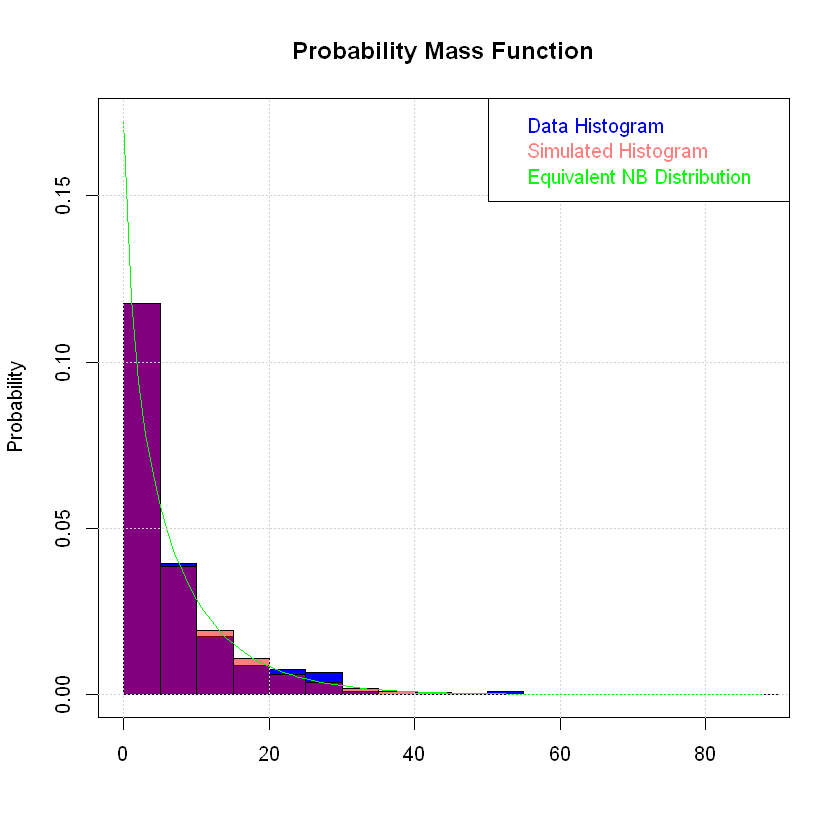

In [20]:
Cols = c(rgb(0, 0, 1, 1),rgb(1, 0, 0, 0.5),'green')
xr = range(d,d_nb)
x =  xr[1]:xr[2]

r = m^2/(v-m)
p = (v-m)/v
np_pdf = dnbinom(x,r,1-p)

d_prob = as.data.frame(table(d))$Freq/length(d)
d_nb_prob = as.data.frame(table(d_nb))$Freq/length(d_nb)

yr = range(d_prob,d_nb_prob,np_pdf)

hist(d,xlim=xr,ylim=yr,freq=F,main='Probability Mass Function',ylab='Probability',xlab='',col=Cols[1])

par(new=T)
hist(d_nb,freq=F,add=T,col=Cols[2])

par(new=T)
plot(x,y=np_pdf,xlim=xr,ylim=yr,type='l',col=Cols[3],xaxt='n',yaxt='n',xlab='',ylab='')

grid()
legend('topright',c('Data Histogram','Simulated Histogram','Equivalent NB Distribution'),text.col = Cols)